### Import needed libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter, StrMethodFormatter # For formatting tick labels
import matplotlib.dates as mdates # For formatting dates on axis to different needed format
import geopandas as gpd
# import folium
import plotly.graph_objs as go
import seaborn as sns
import plotly.express as px
import folium
import json
import datetime as dt
import warnings as w
w.filterwarnings('ignore')

### Import data from csv files and make datafreames.

In [2]:
fact_stamps_df = pd.read_csv('fact_stamps.csv')
fact_transport_df = pd.read_csv('fact_transport.csv')
fact_ts_ipass_df = pd.read_csv('fact_TS_iPASS.csv')
dim_date_df = pd.read_csv('dim_date.csv')
dim_districts_df = pd.read_csv('dim_districts.csv')

### 1. Checking for null values

In [3]:
fact_stamps_df.isnull().sum()

dist_code                   0
month                       0
documents_registered_cnt    0
documents_registered_rev    0
estamps_challans_cnt        0
estamps_challans_rev        0
dtype: int64

In [4]:
fact_transport_df.isnull().sum()

dist_code                    0
month                        0
fuel_type_petrol             0
fuel_type_diesel             0
fuel_type_electric           0
fuel_type_others             0
vehicleClass_MotorCycle      0
vehicleClass_MotorCar        0
vehicleClass_AutoRickshaw    0
vehicleClass_Agriculture     0
vehicleClass_others          0
seatCapacity_1_to_3          0
seatCapacity_4_to_6          0
seatCapacity_above_6         0
Brand_new_vehicles           0
Pre-owned_vehicles           0
category_Non-Transport       0
category_Transport           0
dtype: int64

In [5]:
fact_ts_ipass_df.isnull().sum()

dist_code              0
month                  0
sector                 0
investment in cr       0
number_of_employees    0
dtype: int64

In [6]:
dim_date_df.isnull().sum()

month          0
Mmm            0
quarter        0
fiscal_year    0
dtype: int64

In [7]:
dim_districts_df.isnull().sum()

dist_code    0
district     0
dtype: int64

### 2 Checking for data types

In [8]:
fact_stamps_df.dtypes

dist_code                   object
month                       object
documents_registered_cnt     int64
documents_registered_rev     int64
estamps_challans_cnt         int64
estamps_challans_rev         int64
dtype: object

In [9]:
fact_ts_ipass_df.dtypes

dist_code               object
month                   object
sector                  object
investment in cr       float64
number_of_employees      int64
dtype: object

In [40]:
fact_ts_ipass_df.dtypes

dist_code               object
month                   object
sector                  object
investment in cr       float64
number_of_employees      int64
dtype: object

In [10]:
dim_date_df.dtypes

month          object
Mmm            object
quarter        object
fiscal_year     int64
dtype: object

In [11]:
dim_districts_df.dtypes

dist_code    object
district     object
dtype: object

#### 3. Making columns into proper datatypes

In [3]:
fact_stamps_df.month = pd.to_datetime(fact_stamps_df.month, format = '%Y-%m-%d') 
dim_date_df.month = pd.to_datetime(dim_date_df.month, format = '%Y-%m-%d') 
fact_transport_df.month = pd.to_datetime(fact_transport_df.month, format = '%Y-%m-%d')
fact_ts_ipass_df.month = pd.to_datetime(fact_ts_ipass_df.month, format = '%d-%m-%Y')

### Analysis

#### Objective:
• Explore Stamp Registration, Transportation and Ts-Ipass Datasets.
Understand their attributes, categories and time period.


• Analyze trends and patterns within each department.


• Identify growth opportunities and areas needing attention.


• Find correlation among these departments and report the overall growth of the 
state through insights and relevant visuals such as shape maps.

### Creating `map Area `formatting function

In [4]:
def apply_map_formatting (fig) :
    borders = ['left','top','right']
    ax = plt.gca()
    ax.spines[borders].set_visible(False)
    ax.yaxis.set_major_locator(plt.NullLocator()) ## Removes the little dashes infront of the axis
    return plt.show()

In [5]:
def apply_horizontal_map_formatting (fig) :
    borders = ['bottom','top','right']
    ax = plt.gca()
    ax.spines[borders].set_visible(False)
    ax.xaxis.set_major_locator(plt.NullLocator()) ## Removes the little dashes infront of the axis
    return plt.show()

In [6]:
def clean_plotly_graphv(fig):
    fig.update_xaxes(title_text = '')
    fig.update_yaxes(title_text = '',visible = False)
    fig.update_traces(width = 0.4,
                      textposition = 'outside')
    return fig.show()

### Creating `Axis/Datalabels` formatting functions

In [7]:
# Formatting datalables to thousand separated format
def format_thousand(x,_):
    return f'{x/1000 : .1f}k'

# Formatting Y-Axis to thousand separated format 
def format_thousand_axis(x,_):
    return f'{x/1000 : .0f}k'

# Formatting datalables to Billion separated formate:
def format_billion_axis(x,_):
    return f'{x/1000000000 : .2f}Bn'

# Formatting Major Y-Axis to Billion format: 
def format_billion_major_axis(x,_):
    return f'{x/1000000000 : .0f}Bn'

### Stamp Registration:

#### Q1.How does the revenue generated from document registration vary across districts in Telangana? List down the top 5 districts that showed the highest document registration revenue growth between FY 2019 and 2022.

In [8]:
top_5_dist_by_doc_rev =  fact_stamps_df.groupby(['dist_code'],as_index = True )\
                                                .sum(['documents_registered_rev'])\
                                                .merge(dim_districts_df, left_on = 'dist_code', right_on = 'dist_code')\
                                                .sort_values('documents_registered_rev', ascending = False)\
                                                [['district','documents_registered_rev']]

top_5_dist_by_doc_rev['documents_registered_rev (Bn)'] = round(( top_5_dist_by_doc_rev['documents_registered_rev'] / 10**9 ),2)

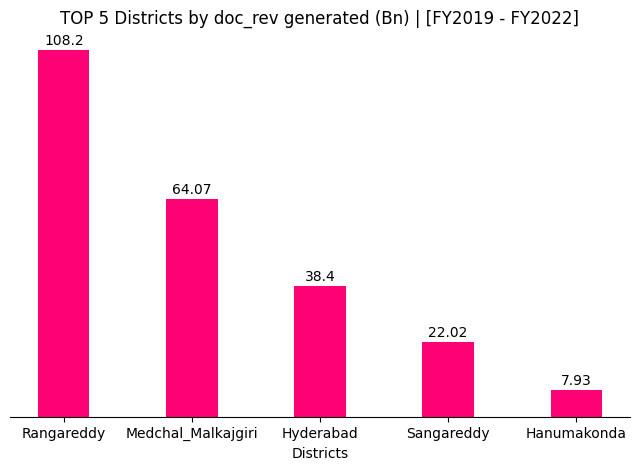

In [9]:
plt.figure(figsize = (8,5))
x = top_5_dist_by_doc_rev['district'].to_list()[:5]
y = top_5_dist_by_doc_rev['documents_registered_rev (Bn)'].to_list()[:5]

datalbl = top_5_dist_by_doc_rev['documents_registered_rev (Bn)'].to_list()[:5]

barplot1 = plt.bar(x,y, width = 0.4, color ='#fe0175' )

plt.bar_label(barplot1,
              labels = datalbl[:5],
              label_type = "edge",
              padding = 2)

plt.xlabel('Districts')
plt.title('TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022]')

apply_map_formatting(barplot1)
## Ans:1.1

In [37]:
## Bar plot using plotly:
top_5_dist_by_doc_rev.head()[['district','documents_registered_rev (Bn)']]
bar1plotly = px.bar(  data_frame = top_5_dist_by_doc_rev.head(),
               x = 'district',
               y = 'documents_registered_rev (Bn)',
               text = top_5_dist_by_doc_rev['documents_registered_rev (Bn)'].head(),
               color_discrete_sequence = ['#fe0175'],
               title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
               width = 750,
               template = 'simple_white'
            )
bar1plotly.update_layout(title_text = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022]',
                         title_x = 0.9
                        )
clean_plotly_graphv(bar1plotly)

In [11]:
line_plot1 = px.line ( data_frame = top_5_dist_by_doc_rev.head(),
                        x = 'district',
                        y = 'documents_registered_rev (Bn)',
                        text = top_5_dist_by_doc_rev['documents_registered_rev (Bn)'].head(),
                        color_discrete_sequence = ['#fe0175'],
                        title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
                        width = 800,
                        template = 'simple_white'
            )
line_plot1.update_layout(
                         title_text = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022]',
                         title_x = 0.9
                        )
line_plot1.update_traces(textposition = 'top center')

### Ans 1 Continued. (Calculating Growth)

In [10]:
filtered_19_22_df = dim_date_df [dim_date_df['fiscal_year'].isin([2019,2022])] 

intm_df= fact_stamps_df.\
         merge(filtered_19_22_df, left_on = 'month', right_on = 'month').\
         merge(dim_districts_df, left_on = 'dist_code', right_on = 'dist_code')

In [11]:
filtered_dim_dates_19 = intm_df[intm_df['fiscal_year'] == 2019]

filtered_dim_dates_22 = intm_df[intm_df['fiscal_year'] == 2022]

In [12]:
doc_rev_generated_19 = filtered_dim_dates_19.\
                       groupby(['fiscal_year','district'],
                       as_index = False)['fiscal_year','district','documents_registered_rev'].sum()

doc_rev_generated_22 = filtered_dim_dates_22\
                       .groupby(['fiscal_year','district'],
                        as_index = False)['fiscal_year','district','documents_registered_rev'].sum()

In [13]:
final_ans_1_b = doc_rev_generated_19.merge(doc_rev_generated_22,
                                           left_on = 'district',
                                           right_on = 'district',
                                           suffixes = ['_19','_22'])\
                                           [['district','documents_registered_rev_19','documents_registered_rev_22']]

final_ans_1_b['diff'] = final_ans_1_b['documents_registered_rev_22'] - final_ans_1_b['documents_registered_rev_19']

final_ans_1_b['Growth_Diff_19_22_pct'] = round((final_ans_1_b['diff']  / final_ans_1_b['documents_registered_rev_19'])*100,2) 

ans_1b_df = final_ans_1_b.sort_values(['Growth_Diff_19_22_pct'],ascending = False)
%store ans_1b_df

Stored 'ans_1b_df' (DataFrame)


### DataFrame1 Styling

In [16]:
ans_1b_df2 = ans_1b_df.head().copy()

ans_1b_df2['Growth_Diff_19_22_pct'] = ans_1b_df2['Growth_Diff_19_22_pct']/100
ans_1b_df2['documents_registered_rev_19'] = round(( ans_1b_df2['documents_registered_rev_19'] / 10**6 ),2)
ans_1b_df2['documents_registered_rev_22'] = round(( ans_1b_df2['documents_registered_rev_22'] / 10**6 ),2)
ans_1b_df2['diff'] = ( ans_1b_df2['diff'] / 10**6 )



ans_1b_styled = ans_1b_df2.style.format({'Growth_Diff_19_22_pct' : '{:.2%}',
                                         'documents_registered_rev_19' : '{:.2f} M',
                                         'documents_registered_rev_22' : '{:.2f} M',
                                         'diff' : '{:.2f} M'})\
                                .bar(color = '#ff6688', subset = ['Growth_Diff_19_22_pct'], height = 70)
ans_1b_styled
# Try different colors here: ['#ff0039','#ff3360','#ff6688','#ff99af','#feccd7']

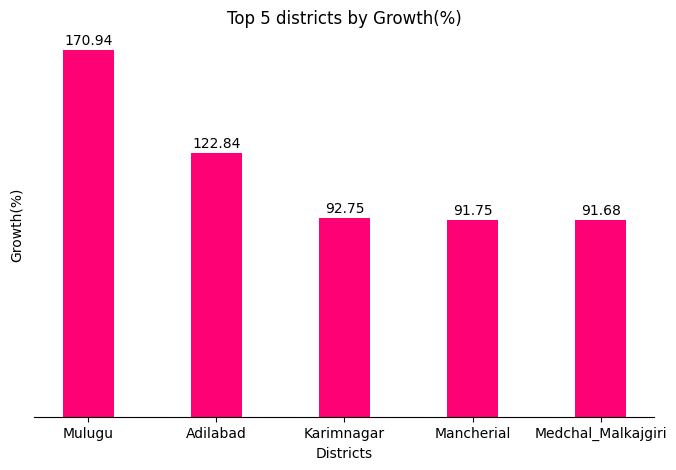

In [17]:
plt.figure(figsize = (8,5))
x = ans_1b_df['district'].to_list()[:5]
y = ans_1b_df['Growth_Diff_19_22_pct'].to_list()[:5]

barplot1_2 = barplot1 = plt.bar(x,
                                y,
                                width = 0.4,
                                color = '#fe0175' )

datalbl = ans_1b_df['Growth_Diff_19_22_pct'].to_list()[:5]

plt.bar_label(barplot1_2,labels = datalbl[:5], label_type = "edge", padding = 2)

plt.xlabel('Districts')
plt.ylabel('Growth(%)')
plt.title('Top 5 districts by Growth(%)')

apply_map_formatting(barplot1_2) # Applying the formatting function created earlier

## Working with JSON map

In [18]:
with open('C:/Data Analysis/Codebasics resume challenge/Telangana Growth Resume Challange/telangana_district_map.json') as f:
    telangana_data = json.load(f)

In [19]:
telangana_data['objects']['TS_DISTRICT_BOUNDARIES_33']['geometries'][0]['properties']

{'OBJECTID': 1,
 'New_Distri': 'Adilabad',
 'Shape_Leng': 3.68809743037,
 'Shape_Area': 0.34229320372,
 'area': 3977.06438795,
 'Dist_Name': 'Adilabad'}

In [20]:
state_id_map = {} ## Creating the mapping column between two data(s) as id column 
for feature in telangana_data['objects']['TS_DISTRICT_BOUNDARIES_33']['geometries']:
    feature['id'] = (feature['properties']['OBJECTID'])
    state_id_map[feature['properties']['Dist_Name']] = feature['id']

In [21]:
stamp_dist_df = fact_stamps_df.merge(dim_districts_df, left_on = 'dist_code', right_on = 'dist_code')
prefinal_df = stamp_dist_df.groupby(['district'], as_index = False, dropna = False)['estamps_challans_rev'].sum()

## Mapping the "id" from states_id_map to get the colors for choroplet map.
prefinal_df['id'] = prefinal_df['district'].apply(lambda x: state_id_map[x]) 

prefinal_df['color'] = np.log10(prefinal_df['estamps_challans_rev'])
prefinal_df.head()

district  estamps_challans_rev  id      color
0              Adilabad             831038256   1   8.919621
1  Bhadradri Kothagudem             616009645   2   8.789588
2           Hanumakonda            5751116148   3   9.759752
3             Hyderabad           28652397786   4  10.457161
4               Jagtial            1202617958   5   9.080128

### Creating a map for TOP 5 Districts by Grwoth% in FY19-22

In [22]:
telangana_gpd_df = gpd.read_file('C:/Data Analysis/Codebasics resume challenge/Telangana Growth Resume Challange/telangana_district_map.json') 

In [23]:
pre = telangana_gpd_df.merge(ans_1b_df[:5],
                             left_on  = 'Dist_Name',
                             right_on  = 'district',
                             how = 'left' )

pre['rank'] = pre['Growth_Diff_19_22_pct'].rank(ascending = False, method = 'dense')

ans_1b_map = pre.explore('Growth_Diff_19_22_pct',
                  tooltip = ['rank','Dist_Name','Growth_Diff_19_22_pct'],
                  popup  = ['rank','Dist_Name','Growth_Diff_19_22_pct'],
                  cmap =  'RdPu'
                  )

ans_1b_map

#### Q2. How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts? List down the top 5 districts where e-stamps revenue contributes significantly more to the revenue than the documents in FY 2022?

In [24]:
combained_df = fact_stamps_df.merge(dim_date_df,
                                    left_on = 'month',
                                    right_on = 'month') ## Joining stamps and dimdate tables

final_df_ans_2 = combained_df.merge(dim_districts_df,
                                    left_on = 'dist_code',
                                    right_on = 'dist_code') ## Joining combined and districts

final_filtered_df = final_df_ans_2[final_df_ans_2['fiscal_year'] == 2022] ## Filtering data where fiscal_year = 2022

final_filtered_df['abs_diff_Bn'] = (final_filtered_df['estamps_challans_rev'] - \
                                    final_filtered_df['documents_registered_rev'] ) /10**9
## Getting the diff between echallan and doc_rev
%store final_df_ans_2

Stored 'final_df_ans_2' (DataFrame)


In [25]:
ans_2_df = final_filtered_df.groupby(['dist_code'],as_index = True )\
                            .sum(['documents_registered_rev'])\
                            .merge(dim_districts_df, left_on = 'dist_code', right_on = 'dist_code')\
                            .sort_values(['abs_diff_Bn'], ascending = False) [['district','abs_diff_Bn']]

ans_2_df['abs_diff_Bn'] = round(ans_2_df['abs_diff_Bn'],2)
%store ans_2_df
## Ans: 2

Stored 'ans_2_df' (DataFrame)


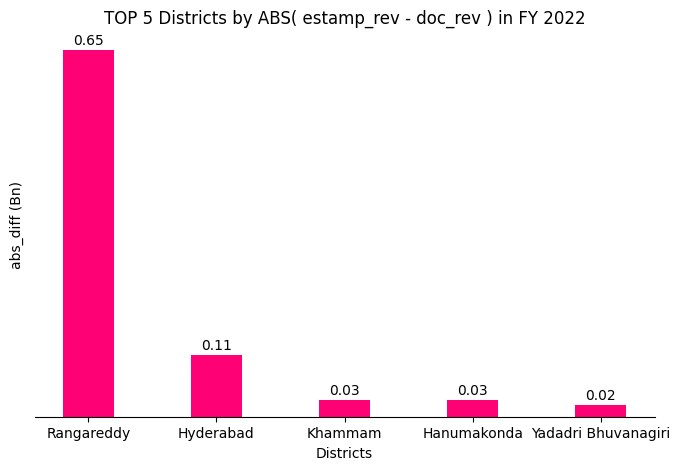

In [26]:
plt.figure(figsize = (8,5))

x = ans_2_df['district'].to_list()[:5]
y = ans_2_df['abs_diff_Bn'].to_list()[:5]

datalbl = ans_2_df['abs_diff_Bn'].to_list()[:5]

barplot2 = plt.bar(x,
                   y,
                   width = 0.4,
                   color = '#fe0175' )

plt.bar_label(barplot2,labels = datalbl[:5], label_type = "edge", padding = 2)

plt.xlabel('Districts')
plt.ylabel('abs_diff (Bn)')
plt.title('TOP 5 Districts by ABS( estamp_rev - doc_rev ) in FY 2022')

apply_map_formatting(barplot2)

In [27]:
## Bar plot using plotly:
bar2plotly = px.bar(  data_frame = ans_2_df[:5],
               x = 'district',
               y = 'abs_diff_Bn',
               text = ans_2_df['abs_diff_Bn'][:5],
               color_discrete_sequence = ['#fe0175'],
               title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
               width = 750,
               template = 'simple_white'
            )
bar2plotly.update_layout(title_text = 'TOP 5 Districts by ABS( estamp_rev - doc_rev ) in FY 2022',
                         title_x = 0.9
                        )
clean_plotly_graphv(bar2plotly)

#### Q3. Is there any alteration of e-Stamp challan count and document registration count pattern since the implementation of e-Stamp challan? If so, what suggestions would you propose to the government?

In [17]:
fact_stamps_df_filteredforcnt = fact_stamps_df[fact_stamps_df['estamps_challans_cnt'] != 0 ] 
## Filtering data for after echallan implementation

fact_stamps_df_filteredforcnt['cnt_diff'] = fact_stamps_df_filteredforcnt['estamps_challans_cnt']\
- fact_stamps_df_filteredforcnt['documents_registered_cnt']

In [18]:
ans_3 = fact_stamps_df_filteredforcnt.groupby(['month'], as_index = False)\
                                     .sum(['cnt_diff'])\
                                     .sort_values(['month'])\
                                     [['month','estamps_challans_cnt','documents_registered_cnt','cnt_diff']]
%store ans_3

## Ans: 3 ==>> Cnt_diff is almost always positive except "01-05-2021".

Stored 'ans_3' (DataFrame)


In [25]:
plt.figure(figsize = (10,5))
x = ans_3['month'].to_list()
y1 = ans_3['documents_registered_cnt'].to_list()
y2 = ans_3['estamps_challans_cnt'].to_list()
fig1 = plt.plot(x,y1,
                label = 'documents_registered_cnt',
                color = '#fe8ec1',
                marker = '.',
                linestyle = '--'
               ) ## ==>> Second dominant color
fig2 = plt.plot(x,
                y2,
                label = 'estamps_challans_cnt',
                color = '#fe0175', ## ==>>  Dominant color
                marker = '.' ) 

plt.legend()
plt.ylabel = 'Diff between '
plt.title('After implementation of E-stamp challan: estamp_challan_cnt > doc_reg_cnt ', pad = 25)
plt.grid(visible = True, axis = 'both',color='grey', linestyle='--', linewidth=0.75, animated =True)

borders = ['top','right']
ax = plt.gca()
ax.spines[borders].set_visible(False)


ax.yaxis.set_major_formatter(FuncFormatter(format_thousand_axis)) # Setting Thousand formattor for Y-Axis


# Adding data labels only where there are markers:
for i, (xi,yi) in enumerate(zip(x,y1)):
    if i%4 == 0:    # Plotting every n (here 4) intances of data lables to avoid cluttering
        plt.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10), ha = 'right', va = 'top',
                color =  '#fe8ec1',
                fontsize = 10

                )

for i, (xi,yi) in enumerate(zip(x,y2)):
    if i%4 == 0:    # Plotting every n (here 4) intances of data lables to avoid cluttering
        plt.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10), ha = 'right', va = 'bottom',
                color = '#fe0175',
                fontsize = 8
                )

ax.xaxis.set_major_formatter(plt.FuncFormatter(mdates.DateFormatter("%b-%y"))) # Axis date formatter
## Without this line format == '2022-01' || With this line format == 'Jan-21'

threshold = fact_stamps_df_filteredforcnt.min()['month']                             ##Defining the threshold for const-line.
ax.axvline(threshold, color = 'grey',ls = 'dashed', label = 'Starting of E-challan')
ax.text(x = threshold,y = 21000,s = 'Starting of E-challan', ha = 'left')     ## Crating label for clarification.
plt.show()


#### Q4. Categorize districts into three segments based on their stamp registration revenue generation during the fiscal year 2021 to 2022.

In [29]:
filtered_21_22_df = final_df_ans_2[final_df_ans_2['fiscal_year'].isin([2021,2022])] 
## Filtering out fiscal_yers in 2021 and 2022

In [30]:
agg_df = filtered_21_22_df.groupby(['dist_code'], as_index = False)\
.sum(['estamps_challans_rev'])\
.sort_values(['estamps_challans_rev'], ascending = False)\
[['dist_code','estamps_challans_rev']]

In [31]:
max_investment_value = agg_df.estamps_challans_rev.max()
min_investment_value = agg_df.estamps_challans_rev.min()

first_threshold = int((max_investment_value - min_investment_value ) * 0.33) + 1

second_threshold = int((max_investment_value - min_investment_value ) * 0.66) + 1

In [32]:
agg_df.loc[(agg_df['estamps_challans_rev'] >= 0) & (agg_df['estamps_challans_rev'] <= first_threshold ), 'Segment'] = 'Low'
agg_df.loc[(agg_df['estamps_challans_rev'] >= first_threshold + 1 ) & (agg_df['estamps_challans_rev'] <= second_threshold ), 'Segment'] = 'Medium'
agg_df.loc[ agg_df['estamps_challans_rev'] >= second_threshold + 1 , 'Segment' ] = 'High'

#### Merge agg_df and districts to find segmented districts by name

In [33]:
dist_agg = agg_df.merge(dim_districts_df,
                        how = 'inner',
                        left_on ='dist_code',
                        right_on = 'dist_code')\
                 .set_index('district')['Segment']\
                 .reset_index()

In [34]:
High_districts = dist_agg[dist_agg['Segment'] == 'High']
Medium_districts = dist_agg[dist_agg['Segment'] == 'Medium']
Low_districts = dist_agg[dist_agg['Segment'] == 'Low']

In [35]:
ans_4 = agg_df.groupby(['Segment'], as_index = False)\
              .count()\
              .sort_values(['estamps_challans_rev'], ascending = False)\
              [['Segment','dist_code']]

ans_4.rename(columns = {'dist_code': '#_Districts'}, inplace = True)
%store ans_4

Stored 'ans_4' (DataFrame)


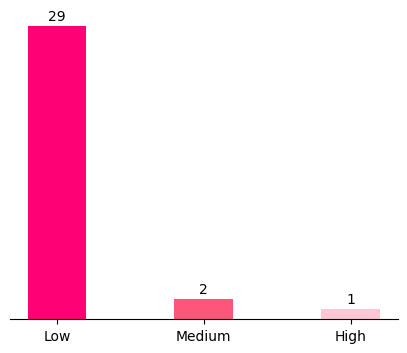

In [36]:
plt.figure(figsize = (5,4))

x = ans_4['Segment'].to_list()
y = ans_4['#_Districts'].to_list()
datalbl = ['29','2','1']

barplot4 = plt.bar(x,
                   y,
                   width = 0.4,
                   color = ['#fe0175','#fe557b','#ffc6d3'])

plt.bar_label(barplot4,labels = datalbl, label_type = "edge", padding = 2)
plt.ylabel = ('# Districts')

apply_map_formatting(barplot4)

## Ans:4
## NOTE:- 29/32 districts are falling into the 'Low' catagory [ 0 - 33 %]\
## indicating there are only few districts that are getting massive investment 

### Transportation:

#### Q5. Investigate whether there is any correlation between vehicle sales and specific months or seasons in different districts. Are there any months or seasons that consistently show higher or lower sales rate, and if yes, what could be the driving factors? (Consider Fuel-Type category only)


In [10]:

needed_df = fact_transport_df.merge(dim_date_df,
                                    how = 'left',
                                    left_on = 'month',
                                    right_on = 'month')

needed_df_5_bottom_3 = needed_df.groupby(['Mmm']).sum()\
         .sort_values(['fuel_type_petrol'], ascending = True)\
         [['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].head(3)

needed_cols =  ['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']

needed_df_5_bottom_3.style.format({ 'fuel_type_petrol' : '{:0,.0f}',
                                        'fuel_type_diesel' : '{:0,.0f}',
                                        'fuel_type_electric' :'{:0,.0f}'})\
                           .highlight_max(subset = needed_cols, color = 'lightgreen')\
                           .highlight_min(subset = needed_cols, color = 'salmon')

needed_df_5_top_3 = needed_df.groupby(['Mmm']).sum()\
         .sort_values(['fuel_type_petrol'], ascending = False)\
         [['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']].head(3)

needed_df_5_top_bottom_3 = needed_df_5_top_3.append(needed_df_5_bottom_3)
# needed_df_5_top_bottom_3

needed_cols =  ['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']

needed_df_5_top_3.style.format({ 'fuel_type_petrol' : '{:0,.0f}',
                                        'fuel_type_diesel' : '{:0,.0f}',
                                        'fuel_type_electric' :'{:0,.0f}'})\
                           .highlight_max(subset = needed_cols, color = 'lightgreen')\
                           .highlight_min(subset = needed_cols, color = 'salmon')

## TOP 3 Months

In [11]:
prefinal_5 = fact_transport_df.merge(dim_date_df,
                                     left_on = 'month',
                                     right_on = 'month')

ans_5 = prefinal_5.groupby(['Mmm'], as_index = False).sum()

ans_5['month_num'] = pd.to_datetime(ans_5['Mmm'], format = '%b').dt.month

ans_5['sort_order'] = np.where(ans_5.month_num > 3,ans_5.month_num - 3,ans_5.month_num + 9)

ans_5.sort_values(['sort_order'], inplace = True)

In [12]:
ans_5.head()

Mmm  fuel_type_petrol  fuel_type_diesel  fuel_type_electric  \
0  Apr            358884             59739                7127   
8  May            364607             65556                4384   
6  Jun            508584             93581                5797   
5  Jul            465809             79271                6992   
1  Aug            482193             69282                9177   

   fuel_type_others  vehicleClass_MotorCycle  vehicleClass_MotorCar  \
0              4973                   316395                  67232   
8              4648                   321903                  61589   
6              5452                   450740                  81528   
5              6920                   407743                  83407   
1              8399                   417597                  94071   

   vehicleClass_AutoRickshaw  vehicleClass_Agriculture  vehicleClass_others  \
0                       7587                      9848                29669   
8                       7300                     15316                33091   
6                       9279                     26820                45049   
5                      10641                     16402                40797   
1                      11786                      9763                35848   

   seatCapacity_1_to_3  seatCapacity_4_to_6  seatCapacity_above_6  \
0               350371                70438                  9839   
8               363343                65251                 10398   
6               512723                85711                 14579   
5               456113                88784                 13719   
1               454882                99936                 13977   

   Brand_new_vehicles  Pre-owned_vehicles  category_Non-Transport  \
0              404618               26113                  395232   
8              414292               24907                  400531   
6              577060               36356                  561107   
5              521713               37279                  509696   
1              528964               40101                  523472   

   category_Transport  fiscal_year  month_num  sort_order  
0               35499       242460          4           1  
8               38668       242460          5           2  
6               52309       242460          6           3  
5               49296       242460          7           4  
1               45593       242460          8           5

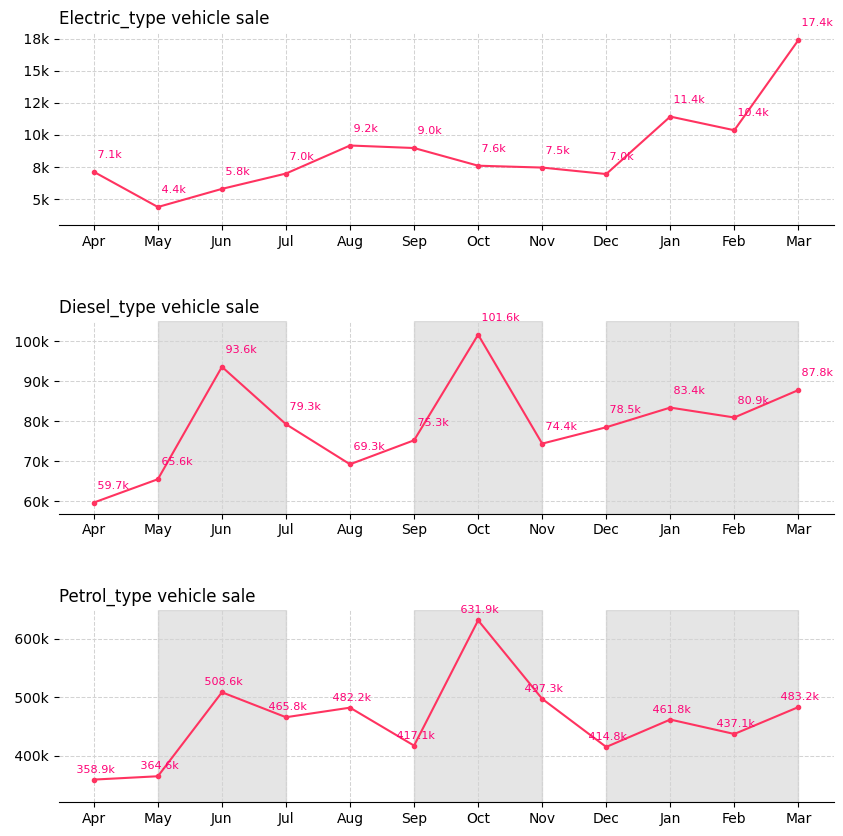

In [34]:
# Plotting 3 subplots:
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))
plt.subplots_adjust(hspace = 0.5)

x1 = ans_5['Mmm'].to_list()
y1 = ans_5['fuel_type_petrol'].to_list()

x2 = ans_5['Mmm'].to_list()
y2 = ans_5['fuel_type_diesel'].to_list()

x3 = ans_5['Mmm'].to_list()
y3 = ans_5['fuel_type_electric'].to_list()

ax3.plot(x1,
         y1,
         color = '#ff3360',
         marker = '.') ## Petrol_type

ax3.set_title('Petrol_type vehicle sale', loc = 'left')
ax3.set_ylim(320000,650000)

ax2.plot(x2,
         y2,
         color = '#ff3360',
         marker = '.') ## Diesel_type

ax2.set_title('Diesel_type vehicle sale',loc = 'left')
ax2.set_ylim(57000,105000) ## X-Axis not starting from 0 because its used to identify trends only.
# ax2.ticklabel_format(axis = 'y', style = 'plain' ) 
  #|
## ==>> To format Y axis labels of the plot to plain numeric insted of auto scientific.

ax1.plot(x3,
         y3,
         color = '#ff3360',
         marker = '.') ## Electric_type

ax1.set_title('Electric_type vehicle sale',loc = 'left')
ax1.set_ylim(3000,18000)

# Making Y-Axis in thousand format:
for ax in [ax1.yaxis,ax2.yaxis,ax3.yaxis]:
    ax.set_major_formatter(FuncFormatter(format_thousand_axis))

# Removing left,top,right spines from all 3 subplots:
for ax in [ax1,ax2,ax3]:
    borders = ['left','top','right']
    ax.spines[borders].set_visible(False)
    ax.grid(visible = True, axis = 'both',color='lightgrey', linestyle='--', linewidth=0.75, animated =True)
    
# Diplaying all the data lables in all 3 subplots:
for i, (xi,yi) in enumerate(zip(x1,ax1.lines[0].get_ydata())):
    #if i%2 == 0:
        ax1.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10),
                color = '#fe0175',
                fontsize = 8
                )
    
for i, (xi,yi) in enumerate(zip(x2,ax2.lines[0].get_ydata())):
    #if i%2 == 0:
        ax2.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10),
                color = '#fe0175',
                fontsize = 8
                )
    
for i,(xi,yi) in enumerate(zip(x3,ax3.lines[0].get_ydata())):
    #if i%2 == 0:
        ax3.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,5),
                color = '#fe0175',
                fontsize = 8,ha = 'center'
                )


x1start,x1stop = x3[1],x3[3] #Defining x-span-1
x2start,x2stop = x3[5],x3[7] #Defining x-span-2
x3start,x3stop = x3[8],x3[11] #Defining x-span-2


for ax in [ax2,ax3]:
    ax.axvspan(x1start,x1stop, color = 'grey', alpha = 0.2)
    ax.axvspan(x2start,x2stop, color = 'grey', alpha = 0.2)
    ax.axvspan(x3start,x3stop, color = 'grey', alpha = 0.2)

    
plt.show()

In [35]:
needed_df_5 = ans_5.copy()[['fuel_type_petrol','fuel_type_diesel','fuel_type_electric']]
columns = {'fuel_type_petrol': 'Petrol', 'fuel_type_diesel' : 'Diesel', 'fuel_type_electric' : 'Electric'}

needed_df_5.rename(columns = columns, inplace = True )

plt.figure(figsize = (5,4))

sns.color_palette("RdPu",as_cmap = True)
fuel_type_heatmap = sns.heatmap(needed_df_5.corr(),
                    annot = True ,
                    cbar = 1,
                    linewidths = 0.2,
                    cmap = 'RdPu')

### Conclusion_5 : *It's clear from the heatmap that petrol_type and diesel_type vehicle sales are highly correlated*

#### Q6. How does the distribution of vehicles vary by vehicle class (MotorCycle, MotorCar, AutoRickshaw, Agriculture) across different districts? Are there any districts with a predominant preference for a specific vehicle class? Consider FY 2022 for analysis.

In [11]:
temp_1_df = fact_transport_df.merge(dim_date_df,
                                    how = 'right',
                                    left_on = 'month',
                                    right_on = 'month') ## Joined transport + date

temp_2_df = temp_1_df.merge(dim_districts_df,
                            left_on = 'dist_code',
                            right_on = 'dist_code')

filtered_temp_2_df = temp_2_df[temp_2_df['fiscal_year'] == 2022] ## Joined (temp_1 + districts)

prefinal_ans_6 = filtered_temp_2_df.groupby(['district'], as_index = False)\
                                   .sum(['vehicleClass_Agriculture'])\
                                   [['district',
                                     'vehicleClass_MotorCar',
                                     'vehicleClass_MotorCycle',
                                     'vehicleClass_AutoRickshaw',
                                     'vehicleClass_Agriculture']]
%store filtered_temp_2_df
# Styling the DataFrame:
num_cols = prefinal_ans_6.columns[1:]

prefinal_ans_6.style.format({'vehicleClass_MotorCar' : '{:0,.0f}',
                                    'vehicleClass_MotorCycle' : '{:0,.0f}',
                                    'vehicleClass_AutoRickshaw' : '{:0,.0f}',
                                    'vehicleClass_Agriculture' :'{:0,.0f}'})\
                        .highlight_max(subset = num_cols, color = 'lightgreen')\
                           .highlight_min(subset = num_cols, color = 'salmon') 
# Ans: 6
prefinal_ans_6

Stored 'filtered_temp_2_df' (DataFrame)


district  vehicleClass_MotorCar  vehicleClass_MotorCycle  \
0                  Adilabad                   1416                    10410   
1      Bhadradri Kothagudem                   3157                    17022   
2                 Hyderabad                  51447                   206819   
3                   Jagtial                   2055                    13639   
4                   Jangoan                   1177                     8617   
5   Jayashankar Bhupalpally                   1343                     9225   
6          Jogulamba Gadwal                    899                    10300   
7                 Kamareddy                   2153                    15184   
8                Karimnagar                   4818                    19411   
9                   Khammam                   5880                    27385   
10    Kumurambheem Asifabad                    479                     6433   
11              Mahabubabad                   1155                    11046   
12             Mahabubnagar                   3300                    17977   
13               Mancherial                   2218                    11603   
14                    Medak                   2347                    11663   
15       Medchal_Malkajgiri                  61071                   164626   
16             Nagarkurnool                   2066                    12229   
17                 Nalgonda                   4927                    27942   
18                   Nirmal                   1581                    10984   
19                Nizamabad                   5824                    28105   
20               Peddapalli                   2205                    10818   
21         Rajanna Sircilla                   1376                     8007   
22               Rangareddy                  71832                   154186   
23               Sangareddy                  14565                    40784   
24                 Siddipet                   3254                    17401   
25                 Suryapet                   3038                    19165   
26                Vikarabad                   5211                    23116   
27               Wanaparthy                   1194                     8771   
28                 Warangal                   2937                    17770   
29      Yadadri Bhuvanagiri                   3216                    14471   

    vehicleClass_AutoRickshaw  vehicleClass_Agriculture  
0                         368                       467  
1                        1388                      2013  
2                        8397                        20  
3                         272                       858  
4                         397                      1225  
5                         218                      1928  
6                         116                       868  
7                         379                       748  
8                        1042                       999  
9                        2690                      2121  
10                        286                       160  
11                        680                       906  
12                       1130                       937  
13                        550                       400  
14                        610                      1579  
15                         83                       261  
16                        366                      1556  
17                        964                      2599  
18                        295                       989  
19                       1011                      1181  
20                        382                       705  
21                        148                       675  
22                         69                       449  
23                       3381                      1570  
24                        524                      2437  
25                        739                      2188  
26 

#### TOP 5 districts for vehicleClass_MotorCycle:

In [37]:
final_ans_6 = prefinal_ans_6.sort_values(['vehicleClass_MotorCycle'], ascending = False)\
                            [['district','vehicleClass_MotorCycle']].head()

final_ans_6.style.format({'vehicleClass_MotorCycle' : '{:0,.0f}'})\
                 .bar(subset = ['vehicleClass_MotorCycle'],color = '#ff6688', height = 70)

#### TOP 5 districts for vehicleClass_MotorCar:

In [38]:
final_ans_6 = prefinal_ans_6.sort_values(['vehicleClass_MotorCar'], ascending = False)\
                            [['district','vehicleClass_MotorCar']].head()

final_ans_6.style.format({'vehicleClass_MotorCar' : '{:0,.0f}'})\
                 .bar(subset = ['vehicleClass_MotorCar'],color = '#ff6688', height = 70)

#### TOP 5 districts for vehicleClass_AutoRickshaw:

In [39]:
final_ans_6 = prefinal_ans_6.sort_values(['vehicleClass_AutoRickshaw'], ascending = False)\
                            [['district','vehicleClass_AutoRickshaw']].head()

final_ans_6.style.format({'vehicleClass_AutoRickshaw' : '{:0,.0f}'})\
                 .bar(subset = ['vehicleClass_AutoRickshaw'],color = '#ff6688', height = 70)

#### TOP 5 districts for vehicleClass_Agriculture

In [40]:
final_ans_6 = prefinal_ans_6.sort_values(['vehicleClass_Agriculture'], ascending = False)\
                            [['district','vehicleClass_Agriculture']].head()

final_ans_6.style.format({'vehicleClass_Agriculture' : '{:0,.0f}'})\
                 .bar(subset = ['vehicleClass_Agriculture'],color = '#ff6688', height = 70)

#### Q7. List down the top 3 and bottom 3 districts that have shown the highest and lowest vehicle sales growth during FY 2022 compared to FY 2021? (Consider and compare categories: Petrol, Diesel and Electric)

In [14]:
temp_1_df = fact_transport_df.merge(dim_date_df,
                                    how = 'right',
                                    left_on = 'month',
                                    right_on = 'month') ## Joined transport + date

temp_2_df = temp_1_df.merge(dim_districts_df,
                            left_on = 'dist_code',
                            right_on = 'dist_code')

filtered_transp_21_22_df = temp_2_df[temp_2_df['fiscal_year'].isin([2021,2022])]\
                           [['fiscal_year',
                             'district',
                             'fuel_type_petrol',
                             'fuel_type_diesel',
                             'fuel_type_electric',
                             'fuel_type_others']]

transp_21_df = temp_2_df[temp_2_df['fiscal_year'].isin([2019])]
vehicle_sale_21 = transp_21_df.groupby(['district','fiscal_year'], as_index = False).sum()\
                              [['fiscal_year',
                                'district',
                                'fuel_type_petrol',
                                'fuel_type_diesel',
                                'fuel_type_electric','fuel_type_others']]

transp_22_df = temp_2_df[temp_2_df['fiscal_year'].isin([2022])]
vehicle_sale_22 = transp_22_df.groupby(['district','fiscal_year'], as_index = False).sum()\
                              [['fiscal_year',
                                'district',
                                'fuel_type_petrol',
                                'fuel_type_diesel',
                                'fuel_type_electric',
                                'fuel_type_others']]

#### TOP 3 - BOTTOM 3 districts by `Petrol_Sale_Growth` 

In [15]:
#TOP 3 BY PETROL
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_petrol_22'] - merged_df['fuel_type_petrol_21']
merged_df['petrol_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_petrol_21']*100,2)

top_3_petrol_df = merged_df.sort_values(['petrol_pct_diff'], ascending = False)\
         [['district',
           'fuel_type_petrol_21',
           'fuel_type_petrol_22',
           'petrol_pct_diff']].head(3) 
#---------------------------------------------------------------------------

#BOTTOM 3 BY PETROL
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_petrol_22'] - merged_df['fuel_type_petrol_21']
merged_df['petrol_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_petrol_21']*100,2)

bottom_3_petrol_df = merged_df.sort_values(['petrol_pct_diff'], ascending = True)\
         [['district',
           'fuel_type_petrol_21',
           'fuel_type_petrol_22',
           'petrol_pct_diff']].head(3)
#---------------------------------------------------------------------------

top_bottom_petrol_df = top_3_petrol_df.append(bottom_3_petrol_df)

top_bottom_petrol_df['petrol_pct_diff'] = top_bottom_petrol_df['petrol_pct_diff']/100

top_bottom_petrol_df.sort_values(['petrol_pct_diff'], ascending = False)\
                    .style.format({'petrol_pct_diff' : '{:.2%}',
                                     'fuel_type_petrol_21' : '{:0,.0f}',
                                     'fuel_type_petrol_22' : '{:0,.0f}'})\
                    .bar(subset = ['petrol_pct_diff'], color = ['salmon','lightgreen'],align = 'mid',height = 70)

#### TOP 3 - BOTTOM 3 districts by `Diesel_Sale_Growth` 

In [43]:
#TOP 3 BY DIESEL
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_diesel_22'] - merged_df['fuel_type_diesel_21']
merged_df['diesel_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_diesel_21']*100,2)

top_3_diesel_df = merged_df.sort_values(['diesel_pct_diff'], ascending = False)\
         [['district',
           'fuel_type_diesel_21',
           'fuel_type_diesel_22',
           'diesel_pct_diff']].head(3) 
#---------------------------------------------------------------------------

#BOTTOM 3 BY DIESEL
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_diesel_22'] - merged_df['fuel_type_diesel_21']
merged_df['diesel_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_diesel_21']*100,2)

bottom_3_diesel_df = merged_df.sort_values(['diesel_pct_diff'], ascending = True)\
         [['district',
           'fuel_type_diesel_21',
           'fuel_type_diesel_22',
           'diesel_pct_diff']].head(3)
#---------------------------------------------------------------------------

top_bottom_diesel_df = top_3_diesel_df.append(bottom_3_diesel_df)

top_bottom_diesel_df['diesel_pct_diff'] = top_bottom_diesel_df['diesel_pct_diff']/100

top_bottom_diesel_df.sort_values(['diesel_pct_diff'], ascending = False)\
                    .style.format({'diesel_pct_diff' : '{:.2%}',
                                     'fuel_type_diesel_21' : '{:0,.0f}',
                                     'fuel_type_diesel_22' : '{:0,.0f}'})\
                    .bar(subset = ['diesel_pct_diff'], color = ['salmon','lightgreen'],align = 'mid',height = 70)

#### TOP 3 - BOTTOM 3 districts by `Electric_Sale_Growth` 

In [44]:
#TOP 3 BY ELECTRIC
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_electric_22'] - merged_df['fuel_type_electric_21']
merged_df['electric_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_electric_21']*100,2)

top_3_electric_df = merged_df.sort_values(['electric_pct_diff'], ascending = False)\
         [['district',
           'fuel_type_electric_21',
           'fuel_type_electric_22',
           'electric_pct_diff']].head(3) 
#---------------------------------------------------------------------------

#BOTTOM 3 BY ELECTRIC
merged_df = vehicle_sale_21.merge(vehicle_sale_22, left_on = 'district', right_on = 'district',suffixes = ['_21',"_22"])
merged_df['diff'] = merged_df['fuel_type_electric_22'] - merged_df['fuel_type_electric_21']
merged_df['electric_pct_diff'] = round(merged_df['diff'] / merged_df['fuel_type_electric_21']*100,2)

bottom_3_electric_df = merged_df.sort_values(['electric_pct_diff'], ascending = True)\
         [['district',
           'fuel_type_electric_21',
           'fuel_type_electric_22',
           'electric_pct_diff']].head(3)
#---------------------------------------------------------------------------

top_bottom_electric_df = top_3_electric_df.append(bottom_3_electric_df)

top_bottom_electric_df['electric_pct_diff'] = top_bottom_electric_df['electric_pct_diff']/100

top_bottom_electric_df.sort_values(['electric_pct_diff'], ascending = False)\
                    .style.format({'electric_pct_diff' : '{:.2%}',
                                     'fuel_type_electric_21' : '{:0,.0f}',
                                     'fuel_type_electric_22' : '{:0,.0f}'})\
                    .bar(subset = ['electric_pct_diff'], color = ['salmon','lightgreen'],align = 'mid',height = 70)

### Ts-Ipass (Telangana State Industrial Project Approval and Self Certification System)

#### Q8. List down the top 5 sectors that have witnessed the most significant investments in FY 2022.

In [45]:
ts_ipass_merged_df = fact_ts_ipass_df.merge(dim_date_df,how = 'right', left_on = 'month', right_on = 'month')
ts_ipass_merged_df.head() 

ts_ipass_merged_df_22 = ts_ipass_merged_df[ts_ipass_merged_df['fiscal_year'].isin([2022])]
## Joining Ts-iPASS and dates and filtering for thr fiscal_year 2022.

In [46]:
ans_8 = ts_ipass_merged_df_22.groupby(['sector'])['investment in cr'].sum()\
                             .reset_index()\
                             .sort_values(['investment in cr'], ascending = False).head(5) 

ans_8['investment in cr'] = round(ans_8['investment in cr'],2)

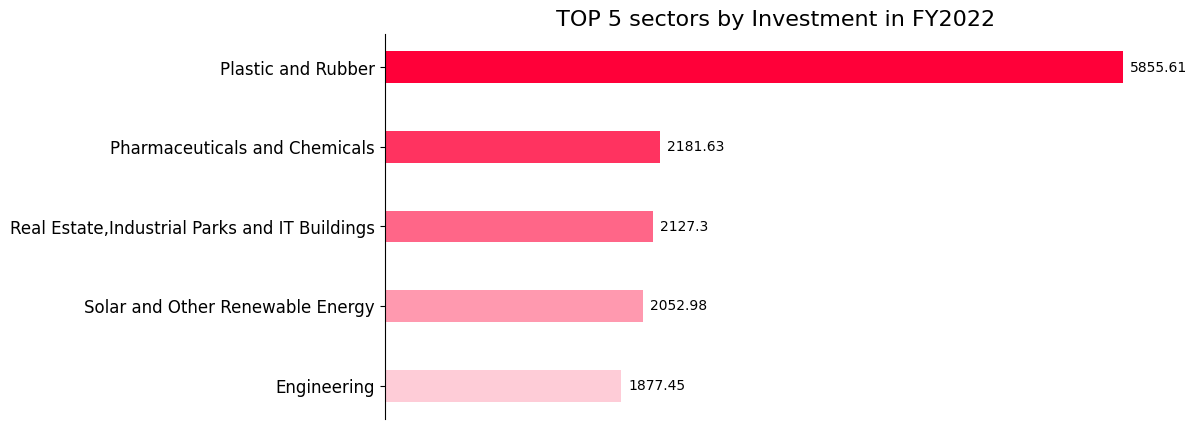

In [47]:
plt.figure(figsize = (10,5))

x = ans_8['sector'].to_list()
y = ans_8['investment in cr'].to_list()
datalbl = ans_8['investment in cr'].to_list()
plt.yticks(color = 'black',fontsize = 12)

barplot8 = plt.barh(x[::-1],
                    y[::-1],
                    height = 0.4,
                    color = ['#ff0039','#ff3360','#ff6688','#ff99af','#feccd7'][::-1])

plt.bar_label(barplot8,labels = datalbl[::-1], label_type = "edge", padding = 5, color = 'black')#, fontweight = 'bold')

plt.title(' TOP 5 sectors by Investment in FY2022', fontsize = 16)

apply_horizontal_map_formatting(barplot8)

#### Q9. List down the top 3 districts that have attracted the most significant sector investments during FY 2019 to 2022? What factors could have led to the substantial investments in these particular districts?

In [48]:
fact_ts_ipass_districts_df = fact_ts_ipass_df.merge(dim_districts_df,
                                                    left_on = 'dist_code',
                                                    right_on = 'dist_code') ## Joining Ts-iPASS with districts

In [49]:
TOP_3_districts_by_investment = fact_ts_ipass_districts_df.groupby(['district'])['investment in cr'].sum()\
                                                          .reset_index()\
                                                          .sort_values(['investment in cr'], ascending = False).head(3)

TOP_3_districts_by_investment['investment in cr'] = round(TOP_3_districts_by_investment['investment in cr'],2) 

TOP_3_districts_by_investment.style.format({'investment in cr' : '{:0,.2f}'})\
                 .bar(subset = ['investment in cr'],color = '#ff6688', height = 70)
## Ans: 9

#### Q10. Is there any relationship between district investments, vehiclessales and stamps revenue within the same district between FY 2021and 2022?

In [50]:
filtered_dates = dim_date_df[dim_date_df['fiscal_year'].isin([2021,2022])] # Filtering the data for Just 2021,2022

fact_transport_df['total_vehicles'] = fact_transport_df['fuel_type_petrol'] # Creating necessary columns.
+ fact_transport_df['fuel_type_diesel']\
+ fact_transport_df['fuel_type_electric']\
+ fact_transport_df['fuel_type_others']


#-------------------------------------------------------------------------

filtered_transport_df = fact_transport_df.merge(filtered_dates,
                                                left_on = 'month',
                                                right_on = 'month')


final_transport_grpd_mmm = filtered_transport_df.groupby(['Mmm'], as_index = False)['total_vehicles'].sum()

final_transport_grpd_mmm['month_num'] = pd.to_datetime(final_transport_grpd_mmm['Mmm'], format = '%b').dt.month
final_transport_grpd_mmm['sort_order'] = np.where(final_transport_grpd_mmm.month_num > 3,
                                               final_transport_grpd_mmm.month_num - 3,
                                               final_transport_grpd_mmm.month_num + 9)
final_transport_grpd_mmm.sort_values(['sort_order'], inplace = True)

x1 = final_transport_grpd_mmm['Mmm'].to_list()
y1 = final_transport_grpd_mmm['total_vehicles'].to_list()
#-------------------------------------------------------------------------

filtered_estamps = fact_stamps_df.merge(filtered_dates,
                                        left_on = 'month',
                                        right_on = 'month')

final_estamps_grpd_mmm = filtered_estamps.groupby(['Mmm'], as_index = False)['estamps_challans_rev'].sum()

final_estamps_grpd_mmm['month_num'] = pd.to_datetime(final_estamps_grpd_mmm['Mmm'], format = '%b').dt.month
final_estamps_grpd_mmm['sort_order'] = np.where(final_estamps_grpd_mmm.month_num > 3,
                                               final_estamps_grpd_mmm.month_num - 3,
                                               final_estamps_grpd_mmm.month_num + 9)
final_estamps_grpd_mmm.sort_values(['sort_order'], inplace = True)

x2 = final_estamps_grpd_mmm['Mmm'].to_list()
y2 = final_estamps_grpd_mmm['estamps_challans_rev'].to_list()
#--------------------------------------------------------------------------

filtered_ts_ipass_df = fact_ts_ipass_df.merge(filtered_dates,
                                              left_on = 'month',
                                              right_on = 'month')

final_tsipass_grpd_mmm = filtered_ts_ipass_df.groupby(['Mmm'], as_index = False)['investment in cr'].sum()

final_tsipass_grpd_mmm['month_num'] = pd.to_datetime(final_tsipass_grpd_mmm['Mmm'], format = '%b').dt.month
final_tsipass_grpd_mmm['sort_order'] = np.where(final_tsipass_grpd_mmm.month_num > 3,
                                               final_tsipass_grpd_mmm.month_num - 3,
                                               final_tsipass_grpd_mmm.month_num + 9)
final_tsipass_grpd_mmm.sort_values(['sort_order'], inplace = True)

x3 = final_tsipass_grpd_mmm['Mmm'].to_list()
y3 = final_tsipass_grpd_mmm['investment in cr'].to_list()


np.set_printoptions(suppress =True) ## To avoid scientific notaion on the Y-Axis 

#### Plotting all sublots

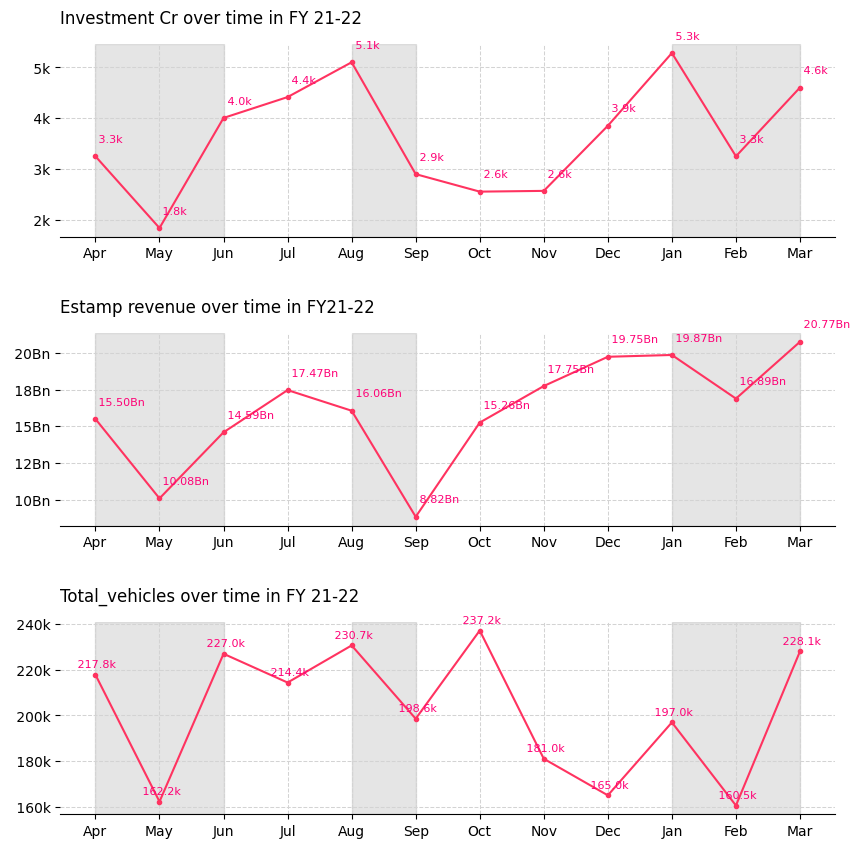

In [51]:
fig , (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))
plt.subplots_adjust(hspace = 0.5)

ax1.plot(x3,y3, color = '#ff3360', marker = '.') ## Investment
ax1.set_title('Investment Cr over time in FY 21-22', pad = 15,loc = 'left')

ax2.plot(x2,y2, color = '#ff3360',marker = '.') ## E-stamp Rev
ax2.set_title('Estamp revenue over time in FY21-22', pad = 15,loc = 'left')
ax2.ticklabel_format(axis = 'y', style = 'plain' ) 
  #|
## ==>> To format Y axis labels of the plot to plain numeric insted of auto scientific.

ax3.plot(x1,y1, color = '#ff3360',marker = '.') ## Total vehicles
ax3.set_title('Total_vehicles over time in FY 21-22', pad = 15,loc = 'left')


borders = ['top','right']
ax = plt.gca()
ax.spines[borders].set_visible(False)

ax.yaxis.set_major_formatter(FuncFormatter(format_thousand_axis)) # Setting Thousand formattor for Y-Axis

# Making Y-Axis in thousand format for subplot 1 and 3:
for ax in [ax1.yaxis,ax2.yaxis]:
    ax.set_major_formatter(FuncFormatter(format_thousand_axis)) ## Converting Major Y-Axis to k format (1,3)
    
# Making Y-Axis in thousand format for subplot 2:
for ax in [ax2.yaxis]:
    ax.set_major_formatter(FuncFormatter(format_billion_major_axis)) ## Converting Major Y-Axis to Bn format(2)


# Removing left,top,right spines from all 3 subplots:
for ax in [ax1,ax2,ax3]:
    borders = ['left','top','right']
    ax.spines[borders].set_visible(False)
    ax.grid(visible = True, axis = 'both',color='lightgrey', linestyle='--', linewidth=0.75, animated =True)
    
# Diplaying all the data lables in all 3 subplots:
for i, (xi,yi) in enumerate(zip(x1,ax1.lines[0].get_ydata())):
    #if i%2 == 0:
        ax1.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10),
                color = '#fe0175',
                fontsize = 8
                )
for i, (xi,yi) in enumerate(zip(x2,ax2.lines[0].get_ydata())):
    #if i%2 == 0:
        ax2.annotate(format_billion_axis(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10),
                color = '#fe0175',
                fontsize = 8
                )
        
for i,(xi,yi) in enumerate(zip(x3,ax3.lines[0].get_ydata())):
    #if i%2 == 0:
        ax3.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,5),
                color = '#fe0175',
                fontsize = 8,
                ha = 'center'
                )
x1start,x1stop = x3[0],x3[2] #Defining x-span-1
x2start,x2stop = x3[4],x3[5] #Defining x-span-2
x3start,x3stop = x3[9],x3[11]   #Defining x-span-3

for ax in [ax1,ax2,ax3]:
    ax.axvspan(x1start,x1stop, color = 'grey', alpha = 0.2)
    ax.axvspan(x2start,x2stop, color = 'grey', alpha = 0.2)
    ax.axvspan(x3start,x3stop, color = 'grey', alpha = 0.2)

### Finding relation between these measures using `correlation` and `Heatmap`
> #### Needed fields: District_investments, Vehicle_sales and Stamps_revenue

In [52]:
fact_ts_ipass_df2 = fact_ts_ipass_df.copy()

fact_ts_ipass_df2['month'] = pd.to_datetime(fact_ts_ipass_df2['month'],format = '%Y-%m-%d')
filtered_dates['month'] = pd.to_datetime(filtered_dates['month'],format = '%Y-%m-%d')

fnl_df = filtered_dates.merge(fact_stamps_df, left_on = 'month', right_on = 'month').\
         merge(fact_transport_df,left_on = 'month', right_on = 'month').\
         merge(fact_ts_ipass_df,left_on = 'month', right_on = 'month' )\
        [['total_vehicles','estamps_challans_rev','investment in cr']]


In [53]:
fnl_df.corr().style.format({
                            'total_vehicles' : '{:.2%}',
                            'estamps_challans_rev' : '{:.2%}',
                            'investment in cr' : '{:.2%}'
                           })

In [54]:
columns = {'total_vehicles': 'Vehicle_sales', 'estamps_challans_rev' : 'Stamps_revenue', 'investment in cr' : 'Investment(Cr)'}
fnl_df.rename(columns = columns, inplace = True )

In [55]:
plt.figure(figsize = (5,4))

# sns.color_palette("mako", as_cmap = True)
sns.heatmap(fnl_df.corr(), annot = True, cmap = "RdPu" ,cbar = 1,linewidths = 0.2,vmin = 0.0014, vmax = 0.0097)

<AxesSubplot: >

### Conclusion_10 : *It's clear from the heatmap that any fields has negligible no correlation at all*

 #### Q11. Are there any particular sectors that have shown substantial investment in multiple districts between FY 2021 and 2022?
 
 

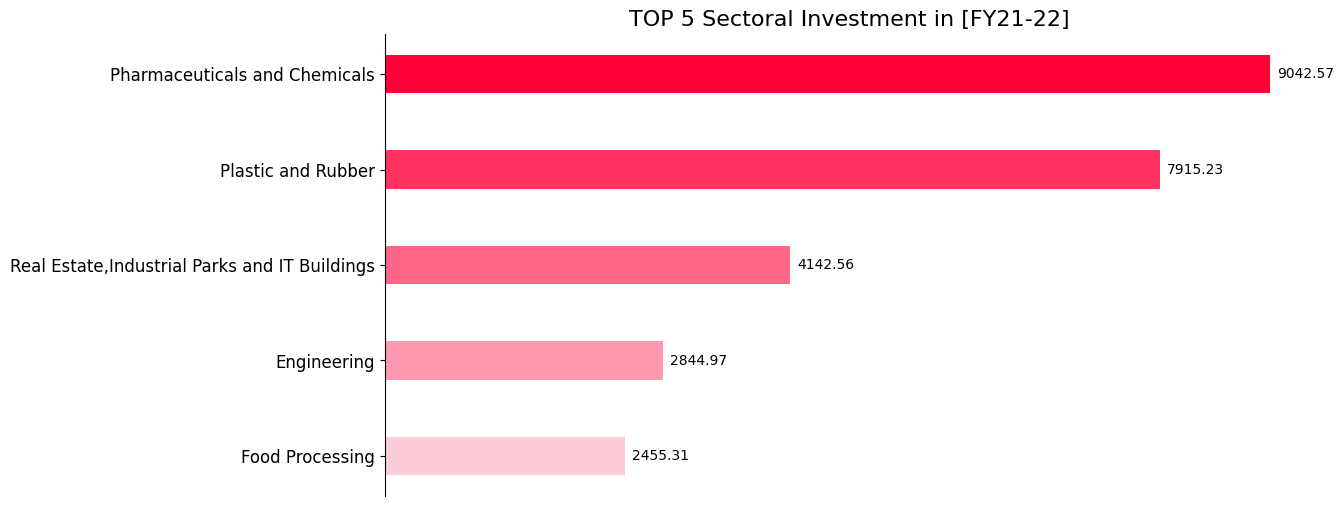

In [56]:
# Setting up required df:
tsipass_dates_df = fact_ts_ipass_df.merge(dim_date_df,
                                          how = 'inner',
                                          left_on = 'month',
                                          right_on = 'month')

filtered_tsipass_dates_df = tsipass_dates_df[tsipass_dates_df['fiscal_year'].isin([2021,2022])]

# Aggregating the data:
substantial_invested_sectors = filtered_tsipass_dates_df.groupby(['sector'])['investment in cr']\
                                                        .sum()\
                                                        .reset_index()\
                                                        .sort_values(['investment in cr'], ascending = False)

substantial_invested_sectors['investment in cr'] = round(substantial_invested_sectors['investment in cr'],2)

#Plotting:
plt.figure(figsize = (12,6))
plt.title('TOP 5 Sectoral Investment in [FY21-22]', fontsize = 16)
plt.yticks(color = 'black',fontsize = 12)
x = substantial_invested_sectors['sector'].to_list()[:5]
y = substantial_invested_sectors['investment in cr'].to_list()[:5]
datalbl = substantial_invested_sectors['investment in cr'].to_list()[:5]

barplot11 = plt.barh(x[::-1],
                     y[::-1],
                     height = 0.4,
                     color = ['#ff0039','#ff3360','#ff6688','#ff99af','#feccd7'][::-1])

plt.bar_label(barplot11,labels = datalbl[::-1], label_type = "edge",padding = 5, color = 'black')

apply_horizontal_map_formatting(barplot11)
 ## Ans: 11

#### Q12. Can we identify any seasonal patterns or cyclicality in the investment trends for specific sectors? Do certain sectors experience higher investments during particular months?

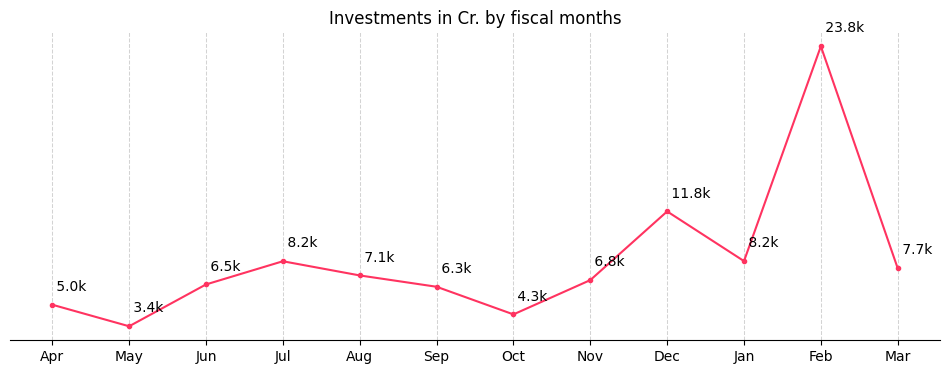

In [57]:
# Getting the df:
new_tsipass_dates_df1 = fact_ts_ipass_df.merge(dim_date_df,how = 'left', left_on = 'month', right_on = 'month')

#Aggregating:
grpd_df =  new_tsipass_dates_df1\
.groupby(['Mmm'], as_index = False)['investment in cr'].sum()

# Getting the month number to be later used for creating Custom-Sort column:
grpd_df['month_num'] = pd.to_datetime(grpd_df['Mmm'], format = '%b').dt.month

## Creating Custom-Sort order to sort values by fiscal_month.
grpd_df['sort_order'] = np.where(grpd_df.month_num > 3,grpd_df.month_num - 3,grpd_df.month_num + 9) 

grpd_df.sort_values(['sort_order'], inplace = True)

#Plotting:
plt.figure(figsize = (12,4))
datalbl = grpd_df['investment in cr'].astype('int')[:12]

x = grpd_df['Mmm']
y = grpd_df['investment in cr']
plt.title('Investments in Cr. by fiscal months')
plt.grid(visible = True, axis = 'x',color='lightgrey', linestyle='--', linewidth=0.75, animated =True)

plot = plt.plot(x,
                y ,
                color = '#ff3360',
                marker = '.')


# Adding data labels only where there are markers:
for i, (xi,yi) in enumerate(zip(x,y)):
    plt.annotate(format_thousand(yi, None), (xi,yi),
                textcoords = "offset points",
                xytext = (0,10)
                )
    
apply_map_formatting(plot)

In [58]:
ans_1b_df2['documents_registered_rev_22'] = round(( ans_1b_df2['documents_registered_rev_22'] / 10**6 ),2)
ans_1b_df2['diff'] = ( ans_1b_df2['diff'] / 10**6 )



ans_1b_styled = ans_1b_df2.style.format({'Growth_Diff_19_22_pct' : '{:.2%}',
                                         'documents_registered_rev_19' : '{:.2f} M'})

SyntaxError: incomplete input (3762956731.py, line 7)

In [59]:
## Working in the #mployement section:
fact_ts_ipass_df.head()

pre_df = fact_ts_ipass_df.merge(dim_date_df, left_on = 'month', right_on = 'month')

df_1 = pre_df .groupby(['fiscal_year'], as_index = False)['number_of_employees'].sum()\
                        .sort_values(['fiscal_year']).head()

df_1['fiscal_year'] = pd.to_datetime(df_1['fiscal_year'], format = '%Y').dt.year

# df_1['number_of_employees'] =round( df_1['number_of_employees']/10**3,2 )

# df_1_styled = df_1.style.format({'number_of_employees': '{:.2f}k'})

employement_over_year = px.line(   df_1,
                                   x = 'fiscal_year',
                                   y = 'number_of_employees',
                                   orientation = 'h',
                                   text = df_1['number_of_employees'],
                                   color_discrete_sequence = ['#fe0175'],
                                   title = 'Employement over time',
                                   width = 800,
                                   template = 'simple_white'
                               )
employement_over_year.update_xaxes(type = 'category')
employement_over_year.update_yaxes(title = '')
employement_over_year.update_traces(textposition = 'top center')

In [60]:
final_df = pre_df.merge(dim_districts_df, left_on = 'dist_code', right_on = 'dist_code')\
                .groupby(['fiscal_year','sector'], as_index = [False,False])['number_of_employees'].sum()\
                .reset_index()
final_df.sort_values(['number_of_employees'], ascending = False)

line_dropdown = px.line(   final_df,#.query("sector == 'Real Estate,Industrial Parks and IT Buildings'"),
                           x = 'fiscal_year',
                           y = 'number_of_employees',
                           orientation = 'h',
#                            text = final_df['number_of_employees'],
                           color_discrete_sequence = ['#fe0175'],
                           title = 'Employement over time',
                           width = 800,
                           template = 'simple_white'
                               )
line_dropdown.update_xaxes(type = 'category')
line_dropdown.update_yaxes(title = '')
line_dropdown.update_traces(textposition = 'top center')

In [61]:
final_df.query("sector == 'Real Estate,Industrial Parks and IT Buildings'")

fiscal_year                                         sector  \
14         2019  Real Estate,Industrial Parks and IT Buildings   
33         2020  Real Estate,Industrial Parks and IT Buildings   
51         2021  Real Estate,Industrial Parks and IT Buildings   
70         2022  Real Estate,Industrial Parks and IT Buildings   

    number_of_employees  
14               246982  
33                98958  
51                  194  
70                 6424

In [62]:
final_df.query("sector == 'Beverages'")

fiscal_year     sector  number_of_employees
2          2019  Beverages                 1437
21         2020  Beverages                 1832
39         2021  Beverages                 2013
57         2022  Beverages                 2186

### 17.  Getting the required dataframe `top_5_districts`

In [110]:
test_df = pd.DataFrame(telangana_data['objects']['TS_DISTRICT_BOUNDARIES_33']['geometries'])
test_df['id'] =  test_df['id'].astype(str)

In [40]:
test_df['districts'] = test_df['properties'].apply(lambda x: x.get('Dist_Name', None))

In [41]:
test_df = test_df[['arcs','type','properties','id','districts']]

In [42]:
test_df['districts'] = test_df['districts'] .str.strip()
test_df['id'] = test_df['id'] .str.strip()

In [43]:
prefinal_df['id'] =  prefinal_df['id'].astype(str)

In [44]:
merged_df = pd.merge(test_df, prefinal_df, left_on = 'id', right_on = 'id', how = 'inner')

In [45]:
merged_df['estamps_challans_rev_Bn'] = merged_df['estamps_challans_rev'].apply(lambda x: f'{float(x)/1e9:.2f}Bn')

In [46]:
top_5_districts = merged_df.sort_values(['estamps_challans_rev'], ascending = False).head(5)
top_5_districts.drop(['district'], axis = 1, inplace = True)
top_5_districts

arcs     type  \
24  [[-14, -351, 397, -373, 398, -371, 399, -369, ...  Polygon   
15             [[348, 349, 350, -15, 351, 352, -347]]  Polygon   
3                                          [[13, 14]]  Polygon   
25  [[-348, -353, -420, 420, 421, 422, 423, 424, 4...  Polygon   
2                             [[7, 8, 9, 10, 11, 12]]  Polygon   

                                           properties  id           districts  \
24  {'OBJECTID': 26, 'New_Distri': 'Rangareddy', '...  26          Rangareddy   
15  {'OBJECTID': 17, 'New_Distri': 'Medchal_Malkaj...  17  Medchal_Malkajgiri   
3   {'OBJECTID': 4, 'New_Distri': 'Hyderabad', 'Sh...   4           Hyderabad   
25  {'OBJECTID': 27, 'New_Distri': 'Sangareddy', '...  27          Sangareddy   
2   {'OBJECTID': 3, 'New_Distri': 'Hanumakonda', '...   3         Hanumakonda   

    estamps_challans_rev estamps_challans_rev_Bn  
24           81336993463                 81.34Bn  
15           48819368222                 48.82Bn  
3            28652397786                 28.65Bn  
25           16708219605                 16.71Bn  
2             5751116148                  5.75Bn

In [47]:
top_5_districts['estamps_challans_rev_Bn'] = top_5_districts['estamps_challans_rev'].apply(lambda x: f'{float(x)/1e9:.2f}Bn')

### Creating a colorscale for top 5 districts

In [48]:
# Define a color scale for the top 5 districts:

color_scale = folium.LinearColormap( 
#                                     colors = ['yellow','orange','red'],
                                     colors = ['#ff0039','#ff3360','#ff6688','#ff99af','#feccd7'][::-1],
                                    vmin = merged_df['estamps_challans_rev'].min(),
                                    vmax = merged_df['estamps_challans_rev'].max())

# Creating top 3 districts based on estamp rev:
top_5_districts = merged_df.sort_values(['estamps_challans_rev'], ascending = False).head(5)

# Define the style function:

def style_function(objects):
    district_name = objects['properties']['Dist_Name'] 
    if district_name in top_5_districts['district'].values:
        return { 
             'fillColor': color_scale(top_5_districts.loc[top_5_districts['districts'] == district_name, 'estamps_challans_rev'].values[0]),
             'color': 'black',
             'weight': '2',
#              'dashArray': '5, 5',
            'fillOpacity': 0.7,
            }
    else:
        return {'fillColor': 'grey',
             'color': 'black',
             'weight': '2',
#              'dashArray': '5, 5',
            'fillOpacity': 0.7
            
        }


In [49]:
top_5_districts['rank'] = top_5_districts['estamps_challans_rev'].rank(ascending = False, method = 'dense')
prefinal_df['rank'] = prefinal_df['estamps_challans_rev'].rank(ascending = False, method = 'dense')

### Working on  Geopandas Dataframe `gdf.explore()` function:

In [50]:
# Make sure you have matplotlib, geopandas and mapclassify installed in not then pip install matplotlib, geopandas, mapclassify
# ! pip install mapclassify

In [54]:
joined_df1 = telangana_gpd_df.merge(top_5_districts,left_on  = 'Dist_Name',right_on  = 'districts', how = 'left' )
joined_df1['rank'] = joined_df1['estamps_challans_rev'].rank(ascending = False, method = 'dense')

In [55]:
ax1 = joined_df1.explore('estamps_challans_rev',
                  tooltip = ['rank','Dist_Name','estamps_challans_rev_Bn'],
                  popup  = ['rank','Dist_Name','estamps_challans_rev_Bn'],
                  cmap = 'RdPu'
                  )

ax1

## Dash App Trial:

In [23]:
# !pip install dash
# !pip install dash_mantine_components

  Using cached dash_mantine_components-0.12.1-py3-none-any.whl (500 kB)


In [32]:
# sorted_df = final_df.sort_values(['sector'])
# dropdown_options = [{'label': x, 'value': x } for x in sorted_df['sector'].unique()]
# dropdown_options

In [63]:
## importing necessary libraries:
from dash import Dash, dcc, Output, Input
from dash import html
import dash_bootstrap_components as dbc
import dash_mantine_components as dmc


## creating an app with BOOTSTRAP theme:
app = Dash(__name__, external_stylesheets = [dbc.themes.BOOTSTRAP])

#==============================================================================================


mygraph = dcc.Graph(figure = {}, style = {'width': '49%', 'height': '60vh'}) ## Output of the defined function(i.e. fig)
# barh = dcc.Graph(figure = {barplot8})

sorted_df = final_df.sort_values(['sector'])
dropdown_options = [{'label': x, 'value': x } for x in sorted_df['sector'].unique()]
dropdown_options

dropdown = dcc.Dropdown( id = 'my-dropdown',
                         options = dropdown_options,
                         value = 'Real Estate,Industrial Parks and IT Buildings',
                         clearable = False,
                         placeholder = 'Select Sectors',
                       style = {'width': '60%', 'height': '5vh'}
                       )

#==============================================================================================

## Defining the app layout:
app.layout = dbc.Container(dbc.Row([
                                dbc.Col([dropdown,mygraph])#, class_name = 'col-10', style = {"height": "80vh"}, width = 5),
#                                 dbc.Col([barplot8],width = {'size': '4', "offset": '3'}) #class_name = 'col-10', style = {"height": "80vh"}, width = 5)

                                ]), fluid = True
                          )
                                                                  
#==============================================================================================

## Adding app callback for interactivity from the input components(here Dropdown):
@app.callback (
                Output(mygraph, component_property = 'figure'), ## Takes graph placeholder and returns the output of the logic func to the comp. prop. argument
                Input('my-dropdown', component_property = 'value') ## Takes dropdown id and returns user selected value to the comp. prop.argument
            )

#==============================================================================================

## Define Input Logic for plotting graphs:

def update_graph(user_input):        ## user_input contains the 'value' from the dropdown (It will be dynamic as drodown changes)  
#     if len(user_input)> 0:
        queried_df = final_df[final_df['sector'] == user_input]
        fig = px.line( queried_df,
                       x = 'fiscal_year',
                       y = 'number_of_employees',
                       text = queried_df['number_of_employees'],
                       color_discrete_sequence = ['#fe0175'],
#                        title = f'Employement over time - {user_input}', ## Dynamic Title .
                       width = 800,
                       template = 'simple_white',
                                   )
        fig.update_xaxes(type = 'category',title = '')
        fig.update_yaxes(title = '# Employees')
        fig.update_traces(textposition = 'top center')
        return fig
    
#==============================================================================================

# Running the app on port 3000. 
if __name__ == '__main__':
    app.run_server(port = 3000, debug = True)

#### Making the df for pie chart showing distribution of TOP 5 districts by `Rev growth ` and ` estamps-doc_reg_rev diff` between FY19-22

In [237]:
ans_2_df.sort_values(['abs_diff_Bn'], ascending= False, inplace=False)
ans_2_df.head()

district  abs_diff_Bn
5            Rangareddy         0.65
8             Hyderabad         0.11
27              Khammam         0.03
22          Hanumakonda         0.03
31  Yadadri Bhuvanagiri         0.02

In [240]:
for dist in ans_2_df['district'][:5]:
    print(dist)

Rangareddy
Hyderabad
Khammam
Hanumakonda
Yadadri Bhuvanagiri


In [241]:
fig = px.bar(  data_frame = ans_2_df[:5],
               y = 'district',
               x = 'abs_diff_Bn',
               text = ans_2_df['abs_diff_Bn'][:5],
               color_discrete_sequence = ['#fe0175'],
               title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
               width = 750,
               template = 'simple_white',
               orientation = 'h'
            )
fig.update_layout(title_text = 'TOP 5 Districts by abs_diff_Bn ',
                         title_x = 0.5)

fig.update_yaxes(type = 'category')
fig.update_layout(yaxis = {'categoryorder': 'total ascending'})

In [257]:
import dash            
import dash_table
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

## Defining DataFrames:
growth_pct_df = ans_1b_df[['district','Growth_Diff_19_22_pct']].copy()
diff_df = ans_2_df.copy()

app = dash.Dash(__name__)

app.layout = html.Div([

        html.Div([
        dcc.Dropdown(id='measure-selector',
            options=[
                     {'label': 'Growth_Pct', 'value': 'growth_pct_df'},
                     {'label': 'E-stamps_rev - doc_reg_revdiff_df', 'value': 'diff_df'}
            ],
            value='growth_pct_df',
            multi=False,
            clearable=False
        ),
        ],className='six columns'),

        html.Div([
            dcc.Graph(id='piechart'),
        ],className='six columns')

])

@app.callback(
     Output('piechart', 'figure'),
     Input('measure-selector', 'value')
)
    
def update_data(msdropval):
    if msdropval ==  'growth_pct_df':

        fig = px.bar(  data_frame = bar_df[:5],
               x = 'Growth_Diff_19_22_pct',
               y = 'district',
               text = bar_df['Growth_Diff_19_22_pct'][:5],
               color_discrete_sequence = ['#fe0175'],
#                title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
               width = 550,
               height = 400,
               template = 'simple_white',
               orientation = 'h'
            )
        fig.update_layout(title_text = 'TOP 5 Districts by Growth %',
                         title_x = 0.5)
        fig.update_layout(yaxis = {'categoryorder': 'total ascending'}) ## Sorting Order
        fig.update_yaxes(title_text = '')

    else: 
           fig = px.bar(  data_frame = ans_2_df[:5],
               x = 'abs_diff_Bn',
               y = 'district',
               text = ans_2_df['abs_diff_Bn'][:5],
               color_discrete_sequence = ['#fe0175'],
#                title = 'TOP 5 Districts by doc_rev generated (Bn) | [FY2019 - FY2022] ',
               width = 550,
               height = 400,
               template = 'simple_white',
               orientation = 'h'
            )
           fig.update_layout(title_text = 'TOP 5 Districts by estamp_rev - doc_rev diff in FY 2022',
                         title_x = 0.5)
           fig.update_layout(yaxis = {'categoryorder': 'total ascending'}) ## Sorting Order
           fig.update_yaxes(title_text = '')

    return (fig)


if __name__ == '__main__':
    app.run_server(debug=True)